In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import openpyxl

In [448]:
read_excel= "Mining_Dataset.xlsx"
data= pd.read_excel(read_excel)

csv="Mining_Dataset.csv"
data.to_csv(csv, index=False)

In [449]:
data.head(10)

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
5,6,Tumbwe,27.399462,-11.473477,1352.0,1.193886,Dur
6,7,Tumbwe,27.397897,-11.472683,1353.0,1.470506,Dur
7,8,Tumbwe,27.396160,-11.473234,1352.0,1.956046,Dur
8,9,Tumbwe,27.395137,-11.473340,1352.0,0.715264,Terne
9,10,Tumbwe,27.394444,-11.474650,1350.0,0.653490,Terne


In [450]:
data.shape

(5247, 7)

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [452]:
data.tail()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
5242,5243,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,5244,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,5245,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,5246,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur
5246,5247,Gambela,27.477834,-11.614092,1284.0,5.506705,Dur


In [453]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [454]:
data["Site"].unique()

array(['Tumbwe', 'LUMATA', 'MUTSHATSHA', 'CITE DE LUALABA',
       'QUARTIER MUSUMBA ', 'BUNKEYA', 'BUNGU BUNGU', 'Kasangiri',
       ' DCP Kasangiri', 'KINSEVERE', 'Gambela'], dtype=object)

In [455]:
data["Classe_Ic"].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide', 'Mou', 'Pateux'], dtype=object)

In [456]:
labeling_IP_dst= LabelEncoder()
data["Site"]= labeling_IP_dst.fit_transform(data["Site"])
data["Classe_Ic"]= labeling_IP_dst.fit_transform(data["Classe_Ic"])

In [457]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   int32  
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 246.1 KB


In [458]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [459]:
data.head (10)

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,10,27.398758,-11.479370,1356.0,1.032063,0
1,2,10,27.398610,-11.478151,1354.0,27.390744,0
2,3,10,27.399395,-11.476759,1354.0,1.541371,0
3,4,10,27.399987,-11.475205,1354.0,1.081573,0
4,5,10,27.400558,-11.474226,1353.0,1.364352,0
5,6,10,27.399462,-11.473477,1352.0,1.193886,0
6,7,10,27.397897,-11.472683,1353.0,1.470506,0
7,8,10,27.396160,-11.473234,1352.0,1.956046,0
8,9,10,27.395137,-11.473340,1352.0,0.715264,5
9,10,10,27.394444,-11.474650,1350.0,0.653490,5


In [460]:
data['Site'].unique()

array([10,  7,  8,  3,  9,  2,  1,  6,  0,  5,  4])

In [461]:
data.shape

(5247, 7)

In [462]:
data.tail()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
5242,5243,4,27.480643,-11.614738,1285.0,1.695698,0
5243,5244,4,27.480092,-11.614721,1284.0,3.926087,0
5244,5245,4,27.477062,-11.612963,1287.0,1.738089,0
5245,5246,4,27.476266,-11.613941,1279.0,11.160760,0
5246,5247,4,27.477834,-11.614092,1284.0,5.506705,0


<Axes: >

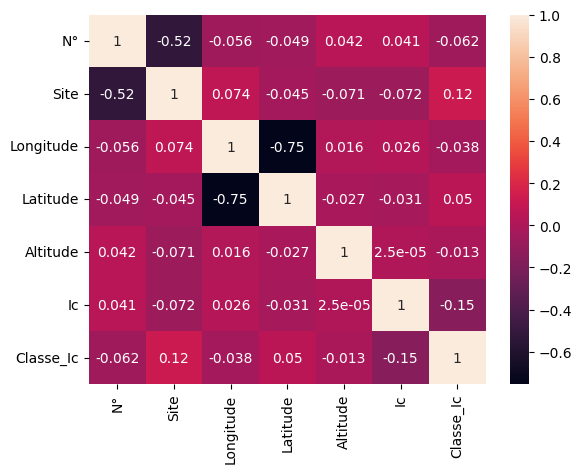

In [463]:
sns.heatmap(data.corr(),annot=True)

In [464]:
data.corr().Classe_Ic.sort_values(ascending=False)

Classe_Ic    1.000000
Site         0.118282
Latitude     0.049534
Altitude    -0.012874
Longitude   -0.038096
N°          -0.061860
Ic          -0.150931
Name: Classe_Ic, dtype: float64

In [465]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [466]:
sub_data = data[['N°','Site','Longitude','Latitude', 'Altitude','Ic','Classe_Ic']]

In [467]:
print(sub_data.shape)
sub_data.head()

(5247, 7)


,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,10,27.398758,-11.479370,1356.0,1.032063,0
1,2,10,27.398610,-11.478151,1354.0,27.390744,0
2,3,10,27.399395,-11.476759,1354.0,1.541371,0
3,4,10,27.399987,-11.475205,1354.0,1.081573,0
4,5,10,27.400558,-11.474226,1353.0,1.364352,0


<Axes: >

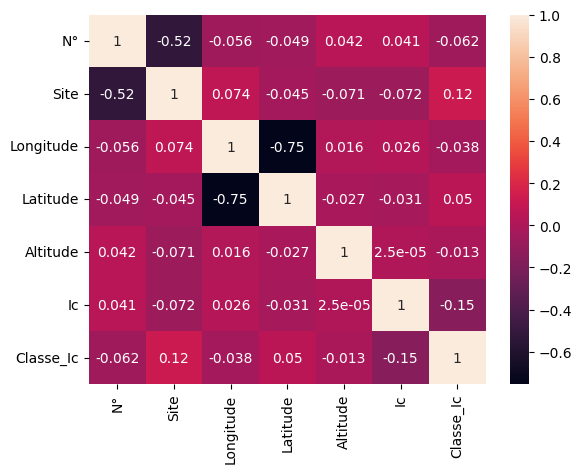

In [468]:
sns.heatmap(sub_data.corr(), annot=True)

In [469]:
#variable independante
X = sub_data.iloc[ : , :-1]
#Variable dependante
y = sub_data.iloc[ : , -1]

In [470]:
X

,N°,Site,Longitude,Latitude,Altitude,Ic
0,1,10,27.398758,-11.479370,1356.0,1.032063
1,2,10,27.398610,-11.478151,1354.0,27.390744
2,3,10,27.399395,-11.476759,1354.0,1.541371
3,4,10,27.399987,-11.475205,1354.0,1.081573
4,5,10,27.400558,-11.474226,1353.0,1.364352
...,...,...,...,...,...,...
5242,5243,4,27.480643,-11.614738,1285.0,1.695698
5243,5244,4,27.480092,-11.614721,1284.0,3.926087
5244,5245,4,27.477062,-11.612963,1287.0,1.738089
5245,5246,4,27.476266,-11.613941,1279.0,11.160760


In [471]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5242    0
5243    0
5244    0
5245    0
5246    0
Name: Classe_Ic, Length: 5247, dtype: int32

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [473]:
#affichage des dimentions
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X train: (3672, 6)
y train: (3672,)
X test: (1575, 6)
y test: (1575,)


In [474]:
sub_data.shape

(5247, 7)

In [475]:
#standardisation des données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [476]:
X_train

array([[ 0.49808943,  0.33796978,  0.06639143, -0.01201733, -0.03298086,
         3.62821225],
       [ 0.06460706,  0.33796978,  0.03139092, -0.03497683, -0.03300519,
        -0.22502749],
       [ 0.38509326,  0.33796978,  0.06482816, -0.01650382, -0.03298437,
        -0.25109193],
       ...,
       [ 0.25227321,  0.33796978,  0.02270343, -0.02231841, -0.03302321,
        -0.17136448],
       [-1.106324  ,  0.33796978,  0.06579706,  0.01173296, -0.03296854,
        -0.22182673],
       [-0.87901007,  0.33796978,  0.05325448,  0.01229189, -0.03298862,
        -0.2383389 ]])

In [477]:
#import tensorflow as tsf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [478]:
model=Sequential()

In [481]:
#ajout de le première couche couche d'entrée
model.add(Dense(20, input_shape=(6,),activation="relu"))

#couche de sortie
model.add(Dense(1,activation="sigmoid"))

#compile le model
model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy",metrics=["accuracy"])

#affichage de l'architecture du reseau de neuronne
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [483]:
# Entrainement du modele
history = model.fit(X_train, y_train, epochs=19, verbose=1, validation_data=(X_test, y_test))

Epoch 1/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2644 - loss: -6258.6221 - val_accuracy: 0.0349 - val_loss: -6843.1543
Epoch 2/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3839 - loss: -6015.0068 - val_accuracy: 0.0349 - val_loss: -7446.8506
Epoch 3/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2983 - loss: -7157.0854 - val_accuracy: 0.6533 - val_loss: -8014.3052
Epoch 4/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2923 - loss: -7770.7866 - val_accuracy: 0.0349 - val_loss: -8696.4385
Epoch 5/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2883 - loss: -8777.1289 - val_accuracy: 0.7213 - val_loss: -9210.1016
Epoch 6/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3485 - loss: -8718.8574 - val_accuracy: 0.6565 - val_loss: -9976.8916
Epoch 7/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3612 - loss: -9639.2256 - val_accuracy: 0.0349 - val_loss: -10667.2500
Epoch 8/19
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [484]:
#visualisation de l'entrainnement du reseau de neuronne
epoch_accuracy=history.history["accuracy"]
epoch_loss=history.history["loss"]

epoch_val_accuracy=history.history["val_accuracy"]
epoch_val_loss=history.history["val_loss"]

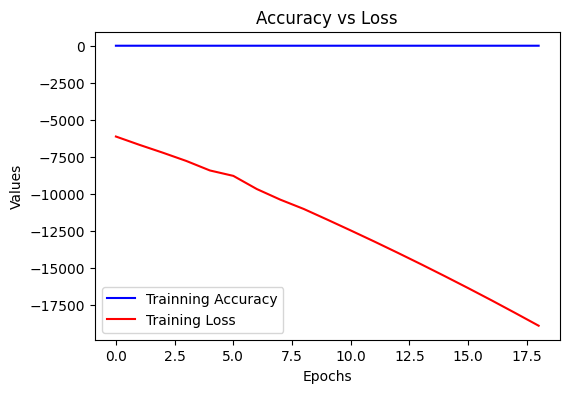

In [485]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0,len(epoch_loss)), epoch_loss, color="red", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.title("Accuracy vs Loss")
plt.legend()
plt.show()

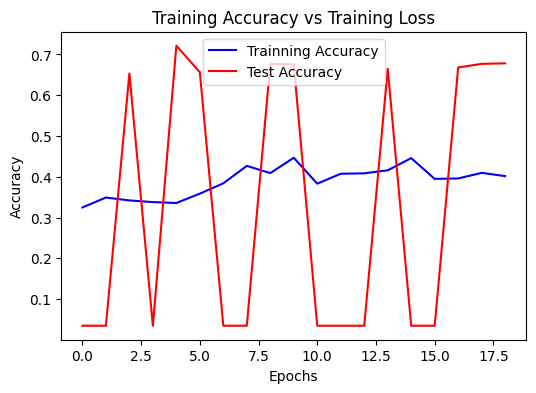

In [486]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

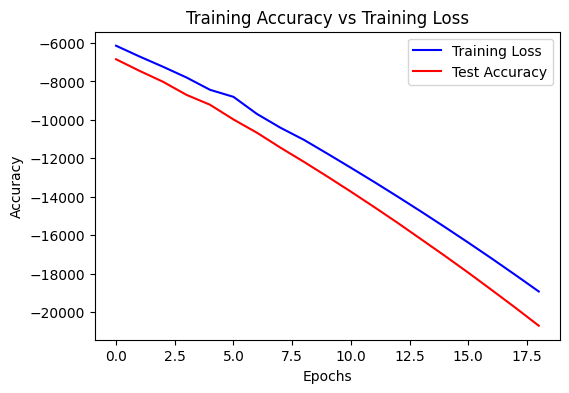

In [487]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color="blue",label="Training Loss")
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

In [488]:
# Predire les Sorties
y_pred = model.predict(X_test)
y_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.        ],
       [0.10320956],
       [1.        ],
       ...,
       [0.16650419],
       [0.10320956],
       [1.        ]], dtype=float32)

In [489]:
model.save('model.h5')

In [490]:
sub_data.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,10,27.398758,-11.479370,1356.0,1.032063,0
1,2,10,27.398610,-11.478151,1354.0,27.390744,0
2,3,10,27.399395,-11.476759,1354.0,1.541371,0
3,4,10,27.399987,-11.475205,1354.0,1.081573,0
4,5,10,27.400558,-11.474226,1353.0,1.364352,0


In [491]:
# Une simple prediction 
model.predict(scaler.transform([[1,	10,	27.39,	-11.47,	1356.0,	1.032]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.]], dtype=float32)

In [492]:
sub_data[sub_data['Classe_Ic'] == 1]

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
20,21,10,27.389360,-11.471787,1341.0000,-0.794529,1
50,51,10,27.390919,-11.475003,1338.5070,-0.794529,1
80,81,10,27.391808,-11.475637,1339.0120,-0.794529,1
110,111,10,27.392803,-11.476314,1340.4610,-0.794529,1
140,141,10,27.393934,-11.476886,1343.5050,-0.794529,1
...,...,...,...,...,...,...,...
5193,5194,5,27.500284,-11.583934,1188.6369,-35.219849,1
5203,5204,5,27.499655,-11.583269,1187.8608,-35.219849,1
5213,5214,5,27.500588,-11.582730,1186.8692,-35.219849,1
5223,5224,5,27.501601,-11.581927,1185.9133,-35.219849,1


In [493]:
# Une simple prediction 
model.predict(scaler.transform([[1,	10,	27.39,	-11.47,	1356.0,	1.032]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.]], dtype=float32)

In [494]:
resultats_1 = model.predict(scaler.transform([[1,	10,	27.39,	-11.47,	1356.0,	1.032]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [495]:
resultats_2 = model.predict(scaler.transform([[1,	10,	27.39,	-11.47,	1356.0,	1.032]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [496]:
resultats_2

array([[1.]], dtype=float32)

In [497]:
if resultats_2 > 0.5:
    print("Malign")
else :
    print("Benign")

Malign
